<a href="https://colab.research.google.com/github/luisfranc123/Tutorials_Statistics_Numerical_Analysis/blob/main/Applied_Statistics/Multinomial_Logit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Multinomial Logistic Regression**




**Multinomial Logistic Regression (MLR)** is a Machine Learning algorithm that is used to predict the probability of categorical dependent variable. In MLR, the dependent variable is a multinomial variable that contains data for which there are more than two categories.

###**Multinomial Logistic Regression Assumptions**

- Multinomial logistic regression requires the dependent variable to be multinomial.
- For a multinomial regression, there are at least 3 factor levels (e.g., 0, 1, 2) of the dependent variable which represent more than two possible discrete outcomes.
- Only the meaningfil variables should be included.
- The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
- The independent variables are linearly related to the log odds.
- Logistic regressio requires quite large sample sizes.



##**Case Study**
---
###**Calssify Consumer Borrowers into One of Five BDI Credit Score Classes**

<img src = "https://miro.medium.com/v2/resize:fit:720/format:webp/1*YaU5paGXg2ujojn-xn3hcg.png" width = '530' height = '350'>

**Image taken from**: [Medium](https://medium.com/@polanitzer/multinomial-logistic-regression-in-python-classify-israeli-consumer-borrowers-into-one-of-five-bdi-d7ad9bf77bd0)




###**Personal Credit Rating**

The personal credit rating reflects our financial habits. When we want to issue a new credit card or take out a loan, the lending institutions ask us for permission to contact a credit rating agency in order toobtain additional information.

In this process, the credit rating is actually determined based on information collected in the Bank of Israel's credit system, which examines the financial habits of the credit applicant. One of the entities is the BDI, whose credit rating scale ranges from 300 to 850. The higher the score, the better the rating, and the higher the chance of receiving credit at an attractive interest rate.

###**What does each score mean?**

The rating is based on parameters such as payment history of loans, credit lines, credit cards, mortages, outstanding debt (i.e., leverage and credit utilization), credit history. credit management and borrowing, and credit mix and distribution.



###**Data**
The dataset is Intrinsic Value's proprietary information, and it is related to BDI score classes of Israeli consumer borrowers. The classification goal is to classify Israeli consumer borrowers into one of five BDI credit score classes (**variable y**).

In [ ]:
# Import libraries to be used
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


###**1. Loading Data**
---

In [ ]:
# This code enable us to have access to the Drive environment
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Unzip file

import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Francisco/GC_Material/Biostatistics_10/Term III/archive(7).zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
path = '/content/cleaned_creditscore_dataset.csv'
credit_data = pd.read_csv(path)
credit_data.head()

,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3,...,Good,809.98,26.822620,265,No,49.574949,80.415,HighspentSmallvaluepayments,312.494,Good
1,February,23.0,Scientist,19114.12,1824.843333,3,4,3,4,-1,...,Good,809.98,31.944960,265,No,49.574949,118.280,LowspentLargevaluepayments,284.629,Good
2,March,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3,...,Good,809.98,28.609352,267,No,49.574949,81.700,LowspentMediumvaluepayments,331.210,Good
3,April,23.0,Scientist,19114.12,1824.843333,3,4,3,4,5,...,Good,809.98,31.377862,268,No,49.574949,199.458,LowspentSmallvaluepayments,223.451,Good
4,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4,6,...,Good,809.98,24.797347,269,No,49.574949,41.420,HighspentMediumvaluepayments,341.489,Good


In [ ]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99935 entries, 0 to 99934
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   month                     99935 non-null  object 
 1   age                       99935 non-null  float64
 2   occupation                99935 non-null  object 
 3   annual_income             99935 non-null  float64
 4   monthly_inhand_salary     99935 non-null  float64
 5   num_bank_accounts         99935 non-null  int64  
 6   num_credit_card           99935 non-null  int64  
 7   interest_rate             99935 non-null  int64  
 8   num_of_loan               99935 non-null  int64  
 9   delay_from_due_date       99935 non-null  int64  
 10  num_of_delayed_payment    99935 non-null  int64  
 11  changed_credit_limit      99935 non-null  float64
 12  num_credit_inquiries      99935 non-null  float64
 13  credit_mix                99935 non-null  object 
 14  outsta

In [ ]:
credit_data.columns.tolist()[:-1]

['month',
 'age',
 'occupation',
 'annual_income',
 'monthly_inhand_salary',
 'num_bank_accounts',
 'num_credit_card',
 'interest_rate',
 'num_of_loan',
 'delay_from_due_date',
 'num_of_delayed_payment',
 'changed_credit_limit',
 'num_credit_inquiries',
 'credit_mix',
 'outstanding_debt',
 'credit_utilization_ratio',
 'credit_history_age',
 'payment_of_min_amount',
 'total_emi_per_month',
 'amount_invested_monthly',
 'payment_behaviour',
 'monthly_balance']

In [ ]:
credit_data.iloc[:, :-1]

,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance
0,January,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,Good,809.98,26.822620,265,No,49.574949,80.415,HighspentSmallvaluepayments,312.494
1,February,23.0,Scientist,19114.12,1824.843333,3,4,3,4,-1,...,4.0,Good,809.98,31.944960,265,No,49.574949,118.280,LowspentLargevaluepayments,284.629
2,March,23.0,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,Good,809.98,28.609352,267,No,49.574949,81.700,LowspentMediumvaluepayments,331.210
3,April,23.0,Scientist,19114.12,1824.843333,3,4,3,4,5,...,4.0,Good,809.98,31.377862,268,No,49.574949,199.458,LowspentSmallvaluepayments,223.451
4,May,23.0,Scientist,19114.12,1824.843333,3,4,3,4,6,...,4.0,Good,809.98,24.797347,269,No,49.574949,41.420,HighspentMediumvaluepayments,341.489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99930,April,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,23,...,3.0,Good,502.38,34.663572,378,No,35.104023,60.971,HighspentLargevaluepayments,479.866
99931,May,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,18,...,3.0,Good,502.38,40.565631,379,No,35.104023,54.186,HighspentMediumvaluepayments,496.652
99932,June,25.0,Mechanic,39628.99,3359.415833,4,6,5729,2,27,...,3.0,Good,502.38,41.255522,380,No,35.104023,24.028,HighspentLargevaluepayments,516.809
99933,July,25.0,Mechanic,39628.99,3359.415833,4,6,7,2,20,...,3.0,Good,502.38,33.638208,381,No,35.104023,251.673,LowspentLargevaluepayments,319.165


In [ ]:
def get_dummies(df):
    df_dummies = df.iloc[:, :-1].copy()  # Make a copy to avoid modifying original and do not include the last column (Response variable)
    for col in df_dummies.columns:
        if df_dummies[col].dtype == 'object':
            df_dummies = pd.get_dummies(df_dummies, columns=[col], dtype=int)
    return df_dummies


In [ ]:
get_dummies(credit_data)

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,...,payment_of_min_amount_Yes,payment_behaviour_HighspentLargevaluepayments,payment_behaviour_HighspentMediumvaluepayments,payment_behaviour_HighspentSmallvaluepayments,payment_behaviour_LowspentLargevaluepayments,payment_behaviour_LowspentMediumvaluepayments,payment_behaviour_LowspentSmallvaluepayments,credit_score_Good,credit_score_Poor,credit_score_Standard
0,23.0,19114.12,1824.843333,3,4,3,4,3,7,11.27,...,0,0,0,1,0,0,0,1,0,0
1,23.0,19114.12,1824.843333,3,4,3,4,-1,7,11.27,...,0,0,0,0,1,0,0,1,0,0
2,23.0,19114.12,1824.843333,3,4,3,4,3,7,11.27,...,0,0,0,0,0,1,0,1,0,0
3,23.0,19114.12,1824.843333,3,4,3,4,5,4,6.27,...,0,0,0,0,0,0,1,1,0,0
4,23.0,19114.12,1824.843333,3,4,3,4,6,4,11.27,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99930,25.0,39628.99,3359.415833,4,6,7,2,23,7,11.50,...,0,1,0,0,0,0,0,0,1,0
99931,25.0,39628.99,3359.415833,4,6,7,2,18,7,11.50,...,0,0,1,0,0,0,0,0,1,0
99932,25.0,39628.99,3359.415833,4,6,5729,2,27,6,11.50,...,0,1,0,0,0,0,0,0,1,0
99933,25.0,39628.99,3359.415833,4,6,7,2,20,6,11.50,...,0,0,0,0,1,0,0,0,0,1


###**2. Exploring Data**
---

In [ ]:
credit_data.columns

Index(['month', 'age', 'occupation', 'annual_income', 'monthly_inhand_salary',
       'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

In [ ]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99935 entries, 0 to 99934
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   month                     99935 non-null  object 
 1   age                       99935 non-null  float64
 2   occupation                99935 non-null  object 
 3   annual_income             99935 non-null  float64
 4   monthly_inhand_salary     99935 non-null  float64
 5   num_bank_accounts         99935 non-null  int64  
 6   num_credit_card           99935 non-null  int64  
 7   interest_rate             99935 non-null  int64  
 8   num_of_loan               99935 non-null  int64  
 9   delay_from_due_date       99935 non-null  int64  
 10  num_of_delayed_payment    99935 non-null  int64  
 11  changed_credit_limit      99935 non-null  float64
 12  num_credit_inquiries      99935 non-null  float64
 13  credit_mix                99935 non-null  object 
 14  outsta

**There are no NANs within the Dataset**

In [ ]:
columns = credit_data.columns.tolist()
columns

['month',
 'age',
 'occupation',
 'annual_income',
 'monthly_inhand_salary',
 'num_bank_accounts',
 'num_credit_card',
 'interest_rate',
 'num_of_loan',
 'delay_from_due_date',
 'num_of_delayed_payment',
 'changed_credit_limit',
 'num_credit_inquiries',
 'credit_mix',
 'outstanding_debt',
 'credit_utilization_ratio',
 'credit_history_age',
 'payment_of_min_amount',
 'total_emi_per_month',
 'amount_invested_monthly',
 'payment_behaviour',
 'monthly_balance',
 'credit_score']

In [ ]:
# We filter the numerical columns:

model_data = credit_data.select_dtypes(include = ['float64', 'int64'])
model_data.columns

Index(['age', 'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'credit_history_age', 'total_emi_per_month', 'amount_invested_monthly',
       'monthly_balance'],
      dtype='object')

In [ ]:
# We add the credit score as an indepdent column
credit_score = credit_data['credit_score'].tolist()
model_data['y_credit_score'] = credit_score
model_data.head()


,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance,y_credit_score
0,23.0,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,809.98,26.822620,265,49.574949,80.415,312.494,Good
1,23.0,19114.12,1824.843333,3,4,3,4,-1,7,11.27,4.0,809.98,31.944960,265,49.574949,118.280,284.629,Good
2,23.0,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,809.98,28.609352,267,49.574949,81.700,331.210,Good
3,23.0,19114.12,1824.843333,3,4,3,4,5,4,6.27,4.0,809.98,31.377862,268,49.574949,199.458,223.451,Good
4,23.0,19114.12,1824.843333,3,4,3,4,6,4,11.27,4.0,809.98,24.797347,269,49.574949,41.420,341.489,Good


In [ ]:
# Double check to see if there are any NAs values.
model_data.isnull().sum()


,0
age,0
annual_income,0
monthly_inhand_salary,0
num_bank_accounts,0
num_credit_card,0
interest_rate,0
num_of_loan,0
delay_from_due_date,0
num_of_delayed_payment,0
changed_credit_limit,0


Check correlation between variables to identify possible collinearity.

In [ ]:
print(model_data.drop(['y_credit_score'], axis = 1).corr().round(2))

                           age  annual_income  monthly_inhand_salary  \
age                       1.00           0.01                   0.09   
annual_income             0.01           1.00                   0.03   
monthly_inhand_salary     0.09           0.03                   1.00   
num_bank_accounts        -0.00          -0.00                  -0.01   
num_credit_card          -0.01           0.00                  -0.00   
interest_rate            -0.00          -0.00                  -0.01   
num_of_loan              -0.05          -0.00                  -0.06   
delay_from_due_date      -0.17          -0.01                  -0.25   
num_of_delayed_payment    0.00           0.00                  -0.00   
changed_credit_limit     -0.16           0.00                  -0.18   
num_credit_inquiries     -0.00           0.00                  -0.01   
outstanding_debt         -0.20          -0.00                  -0.27   
credit_utilization_ratio  0.03           0.01                   

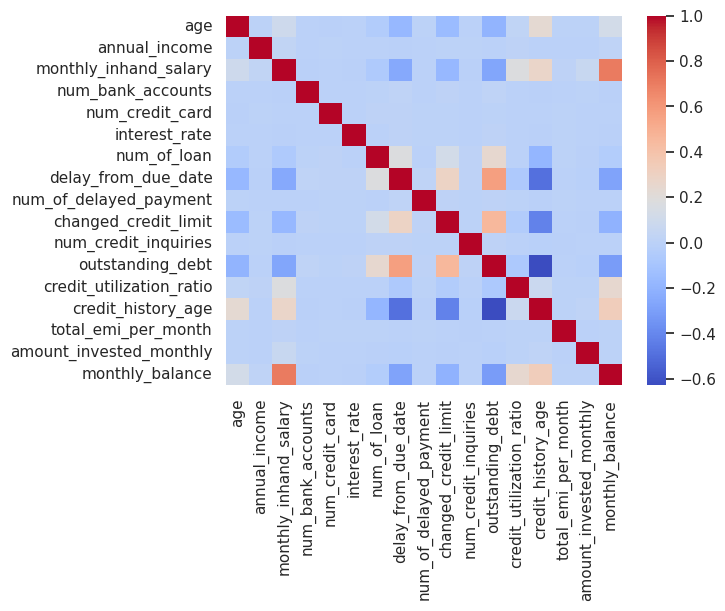

In [ ]:
sns.heatmap(model_data.drop(['y_credit_score'],
                            axis = 1).corr(),
                            #annot = True,
                            cmap = 'coolwarm')
plt.show()

In [ ]:
len(credit_data.columns.tolist())

23

Based on the previouos results, we take a closer look at the pair of varialbles that are closely correlated to each other to avoid having multicollinearity within the model.

In [ ]:
print(model_data[['outstanding_debt', 'credit_history_age']].corr())
print('-------------')
print(model_data[['monthly_inhand_salary', 'monthly_balance']].corr())
print('-------------')
print(model_data[['delay_from_due_date', 'credit_history_age']].corr())

                    outstanding_debt  credit_history_age
outstanding_debt            1.000000           -0.629409
credit_history_age         -0.629409            1.000000
-------------
                       monthly_inhand_salary  monthly_balance
monthly_inhand_salary               1.000000         0.702769
monthly_balance                     0.702769         1.000000
-------------
                     delay_from_due_date  credit_history_age
delay_from_due_date             1.000000           -0.491153
credit_history_age             -0.491153            1.000000


We now exclude the columns `outstanding_debt` and `monthly_inhand_salary`:

In [ ]:
model_data.drop(['outstanding_debt', 'monthly_inhand_salary'],
                axis = 1,
                inplace = True)

**Check the categories balance**:

In [ ]:
model_data['y_credit_score'].value_counts()

,count
y_credit_score,
Standard,53132
Poor,28993
Good,17810


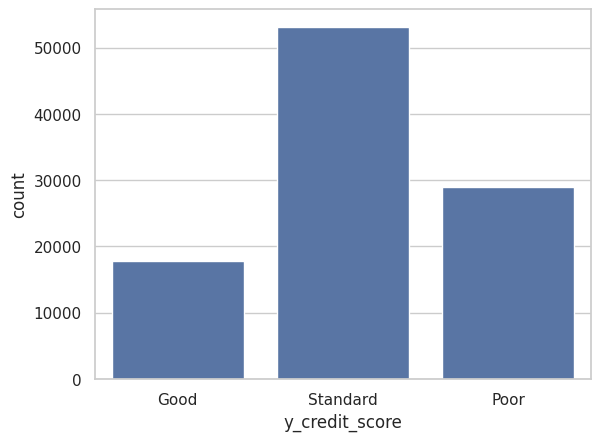

In [ ]:
sns.countplot(x = 'y_credit_score', data = model_data)
plt.show()

We can now make a visualization of the `credit score` based on `occupation`.


In [ ]:
credit_data.groupby('occupation')['credit_score'].value_counts()

occupation    credit_score
Accountant    Standard        3500
              Poor            2036
              Good            1205
Architect     Standard        3733
              Poor            1855
              Good            1231
Developer     Standard        3584
              Poor            1924
              Good            1210
Doctor        Standard        3597
              Poor            1804
              Good            1162
Engineer      Standard        3503
              Poor            2094
              Good            1263
Entrepreneur  Standard        3429
              Poor            2032
              Good            1181
Journalist    Standard        3439
              Poor            1840
              Good            1253
Lawyer        Standard        3870
              Poor            1965
              Good            1258
Manager       Standard        3382
              Poor            1855
              Good            1190
Mechanic      Standard        3623
              Poor            2044
              Good            1106
MediaManager  Standard        3710
              Poor            1764
              Good            1243
Musician      Standard        3367
              Poor            1786
              Good            1189
Scientist     Standard        3477
              Poor            2062
              Good            1200
Teacher       Standard        3418
              Poor            2026
              Good            1224
Writer        Standard        3500
              Poor            1906
              Good             895
Name: count, dtype: int64

<Axes: xlabel='occupation'>

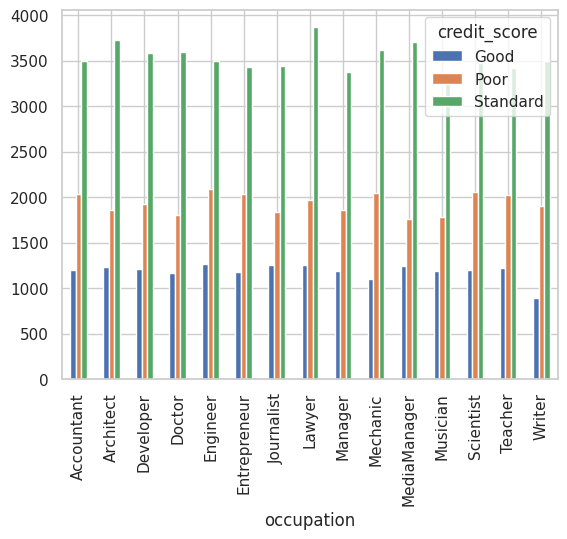

In [ ]:
pd.crosstab(credit_data['occupation'], credit_data['credit_score']).plot(kind = 'bar')

As observed, the `credit score` proportion of each occupation is quite similar to each other.

As we can observe from the graph, there is some unbalance present in the categories, having a Standard class significantly greater than the other two scores.

Let's do some more exploration:

In [ ]:
model_data.y_credit_score.unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [ ]:
model_data.groupby('y_credit_score').mean().round(3)

,age,annual_income,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance
y_credit_score,,,,,,,,,,,,,,,
Good,36.388,184684.799,15.046,21.217,73.996,4.423,10.895,26.025,7.104,24.282,32.688,284.673,1478.634,694.396,477.850
Poor,31.182,154993.528,18.727,23.985,76.209,5.291,29.746,32.241,11.048,30.891,31.986,169.957,1364.167,615.450,345.382
Standard,33.426,185356.908,16.863,22.066,69.923,4.747,19.753,31.341,11.135,27.108,32.313,227.696,1398.139,630.906,409.351


###**3. Preprocessing Data**
---


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
model_data_scale = scaler.fit(model_data.drop(['y_credit_score'], axis = 1))


In [ ]:
model_data.shape

(99935, 16)

In [ ]:
#model_data.columns
model_data.drop(['y_credit_score'], axis = 1).columns.tolist()

['age',
 'annual_income',
 'num_bank_accounts',
 'num_credit_card',
 'interest_rate',
 'num_of_loan',
 'delay_from_due_date',
 'num_of_delayed_payment',
 'changed_credit_limit',
 'num_credit_inquiries',
 'credit_utilization_ratio',
 'credit_history_age',
 'total_emi_per_month',
 'amount_invested_monthly',
 'monthly_balance']

In [ ]:
columns = model_data.drop(['y_credit_score'], axis = 1).columns.tolist()
model_data_2 = pd.DataFrame(scaler.transform(model_data.drop(['y_credit_score'], axis = 1)),
             columns = columns)

model_data_2['y_credit_score'] =  model_data['y_credit_score']
model_data_2.head()

,age,annual_income,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance,y_credit_score
0,0.214286,0.000501,0.002223,0.002668,0.000345,0.333333,0.111111,0.002273,0.408652,0.00154,0.227421,0.655087,0.000602,0.008042,0.195056,Good
1,0.214286,0.000501,0.002223,0.002668,0.000345,0.333333,0.055556,0.002273,0.408652,0.00154,0.398165,0.655087,0.000602,0.011828,0.177662,Good
2,0.214286,0.000501,0.002223,0.002668,0.000345,0.333333,0.111111,0.002273,0.408652,0.00154,0.286978,0.660050,0.000602,0.008170,0.206739,Good
3,0.214286,0.000501,0.002223,0.002668,0.000345,0.333333,0.138889,0.001591,0.293603,0.00154,0.379262,0.662531,0.000602,0.019946,0.139475,Good
4,0.214286,0.000501,0.002223,0.002668,0.000345,0.333333,0.152778,0.001591,0.408652,0.00154,0.159912,0.665012,0.000602,0.004142,0.213155,Good


Let's calculate again the mean of each feature per category:

In [ ]:
model_data_2.groupby('y_credit_score').mean().round(3)

,age,annual_income,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance
y_credit_score,,,,,,,,,,,,,,,
Good,0.533,0.007,0.009,0.014,0.013,0.369,0.221,0.007,0.313,0.009,0.423,0.704,0.018,0.069,0.298
Poor,0.409,0.006,0.011,0.016,0.013,0.441,0.483,0.008,0.404,0.012,0.400,0.419,0.017,0.062,0.216
Standard,0.463,0.007,0.010,0.015,0.012,0.396,0.344,0.008,0.406,0.010,0.410,0.563,0.017,0.063,0.256


###**4. Implementing the model**

If everithing looks good, split the data into training and test sets:

####**4.1. Split features and Target Variable (X, y)**

In [ ]:
from sklearn.model_selection import train_test_split
X = model_data_2.iloc[:, :-1] # features
y = model_data_2['y_credit_score'] # target (response variable)

print(X)
print("---------------")
print(y)

            age  annual_income  num_bank_accounts  num_credit_card  \
0      0.214286       0.000501           0.002223         0.002668   
1      0.214286       0.000501           0.002223         0.002668   
2      0.214286       0.000501           0.002223         0.002668   
3      0.214286       0.000501           0.002223         0.002668   
4      0.214286       0.000501           0.002223         0.002668   
...         ...            ...                ...              ...   
99930  0.261905       0.001349           0.002779         0.004003   
99931  0.261905       0.001349           0.002779         0.004003   
99932  0.261905       0.001349           0.002779         0.004003   
99933  0.261905       0.001349           0.002779         0.004003   
99934  0.261905       0.001349           0.002779         0.004003   

       interest_rate  num_of_loan  delay_from_due_date  \
0           0.000345     0.333333             0.111111   
1           0.000345     0.333333          

####**4.2. Split data into training and test sets**

In [ ]:
# Split the data into training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 123)

####**4.3. Train the Model**


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create the model
Logit_Model = LogisticRegression(multi_class = 'multinomial',
                                 solver = 'lbfgs',
                                 max_iter = 300)
# Train the model
Logit_Model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=300, multi_class='multinomial')

####**4.4. Make Predictions**

Let's see how well the model performs on ur test data set:

In [ ]:
y_pred = Logit_Model.predict(X_test)
y_pred[:10]

array(['Standard', 'Standard', 'Poor', 'Standard', 'Poor', 'Standard',
       'Standard', 'Poor', 'Standard', 'Standard'], dtype=object)

In [ ]:
user = int(input("How many predictions do you want to compare?: "))
pd.DataFrame({'y_test': y_test[:user],
              'y_pred': y_pred[:user]}).reset_index(drop = True)

How many predictions do you want to compare?: 10


,y_test,y_pred
0,Standard,Standard
1,Standard,Standard
2,Poor,Poor
3,Standard,Standard
4,Poor,Poor
5,Standard,Standard
6,Poor,Standard
7,Poor,Poor
8,Good,Standard
9,Standard,Standard


####**4.5. Evaluate the Model**

We'll use some metrics such as accuracy, a confusion matrix, and a classification report.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("--------------------------------------------------")
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("--------------------------------------------------")
# Classification Report

print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.590
--------------------------------------------------
Confusion Matrix:
[[  910    43  3568]
 [  204  2930  4116]
 [  803  1517 10893]]
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

        Good       0.47      0.20      0.28      4521
        Poor       0.65      0.40      0.50      7250
    Standard       0.59      0.82      0.69     13213

    accuracy                           0.59     24984
   macro avg       0.57      0.48      0.49     24984
weighted avg       0.59      0.59      0.56     24984



According to the results illustrated before, the model has a classification  accuracy of 0.59, which considering the number of features included within the model and the model's predictive power, it is a decent accuracy to start working with. We can evaluate another models, such as **Random Forest Classification Trees** or **Neural Networks** to improve the classification accuracy.

####**4.6. Visualize the Results**

Finally, let's visualize the decision boundaries or data distribution. Here's a quick example of a scatter plot:

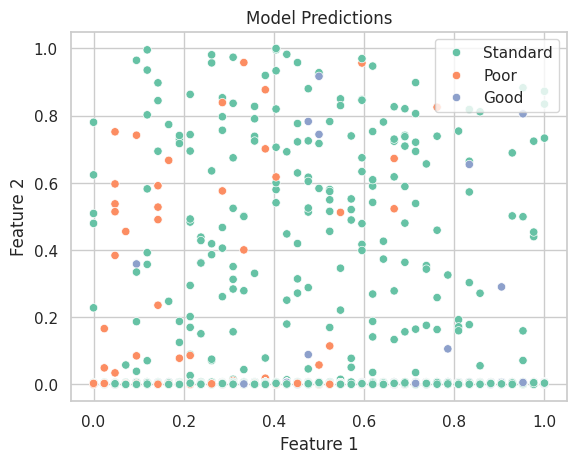

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x = X_test.iloc[:, 0],
            y = X_test.iloc[:, 1],
            hue = y_pred,
            palette = 'Set2')
plt.title("Model Predictions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

###**5. Improving the model's performance by including `Occupation` within the model's parameters.**
---

In [ ]:
X.columns

Index(['age', 'annual_income', 'num_bank_accounts', 'num_credit_card',
       'interest_rate', 'num_of_loan', 'delay_from_due_date',
       'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_utilization_ratio',
       'credit_history_age', 'total_emi_per_month', 'amount_invested_monthly',
       'monthly_balance'],
      dtype='object')

In [ ]:
X.columns.tolist()[:-1]

['age',
 'annual_income',
 'num_bank_accounts',
 'num_credit_card',
 'interest_rate',
 'num_of_loan',
 'delay_from_due_date',
 'num_of_delayed_payment',
 'changed_credit_limit',
 'num_credit_inquiries',
 'credit_utilization_ratio',
 'credit_history_age',
 'total_emi_per_month',
 'amount_invested_monthly']

In [ ]:
pd.get_dummies(pd.Series(list('abc')), dtype=float)
X['occupation'] = credit_data['occupation']
X_encoded = pd.get_dummies(X.occupation, dtype = int)
#X.columns.tolist()
X_encoded[X.columns.tolist()[:-1]] = X[X.columns.tolist()[:-1]]
X_encoded.head()

,Accountant,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,...,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance
0,0,0,0,0,0,0,0,0,0,0,...,0.333333,0.111111,0.002273,0.408652,0.00154,0.227421,0.655087,0.000602,0.008042,0.195056
1,0,0,0,0,0,0,0,0,0,0,...,0.333333,0.055556,0.002273,0.408652,0.00154,0.398165,0.655087,0.000602,0.011828,0.177662
2,0,0,0,0,0,0,0,0,0,0,...,0.333333,0.111111,0.002273,0.408652,0.00154,0.286978,0.660050,0.000602,0.008170,0.206739
3,0,0,0,0,0,0,0,0,0,0,...,0.333333,0.138889,0.001591,0.293603,0.00154,0.379262,0.662531,0.000602,0.019946,0.139475
4,0,0,0,0,0,0,0,0,0,0,...,0.333333,0.152778,0.001591,0.408652,0.00154,0.159912,0.665012,0.000602,0.004142,0.213155


In [ ]:
# Split the data into training and testing subsets

X_train_, X_test_, y_train_, y_test_ = train_test_split(X_encoded, y,
                                                    test_size = 0.25,
                                                    random_state = 123)

In [ ]:
# Create the model
Logit_Model_ = LogisticRegression(multi_class = 'multinomial',
                                 solver = 'lbfgs',
                                 max_iter = 300)
# Train the model
Logit_Model_.fit(X_train_, y_train_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=300, multi_class='multinomial')

In [ ]:
# Mae predictions employing the new model
y_pred_ = Logit_Model_.predict(X_test_)
y_pred_[:10]

array(['Standard', 'Standard', 'Poor', 'Standard', 'Poor', 'Standard',
       'Standard', 'Poor', 'Standard', 'Standard'], dtype=object)

In [ ]:
# Comparing the model's prediction with the actual values
user = int(input("How many predictions do you want to compare?: "))
pd.DataFrame({'y_test': y_test_[:user],
              'y_pred': y_pred_[:user]}).reset_index(drop = True)

How many predictions do you want to compare?: 10


,y_test,y_pred
0,Standard,Standard
1,Standard,Standard
2,Poor,Poor
3,Standard,Standard
4,Poor,Poor
5,Standard,Standard
6,Poor,Standard
7,Poor,Poor
8,Good,Standard
9,Standard,Standard


In [ ]:
# Evaluate's the new model's performance
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
print(f"Accuracy: {accuracy_score(y_test_, y_pred_):.3f}")
print("--------------------------------------------------")
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_, y_pred_))
print("--------------------------------------------------")
# Classification Report

print("Classification Report:")
print(classification_report(y_test_, y_pred_))

Accuracy: 0.592
--------------------------------------------------
Confusion Matrix:
[[  941    46  3534]
 [  199  2959  4092]
 [  818  1496 10899]]
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

        Good       0.48      0.21      0.29      4521
        Poor       0.66      0.41      0.50      7250
    Standard       0.59      0.82      0.69     13213

    accuracy                           0.59     24984
   macro avg       0.58      0.48      0.49     24984
weighted avg       0.59      0.59      0.56     24984

